In [1]:
!pip install deepface

     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 2.3 MB 10.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=0e8a6c111d9db5811433a2deb4219547b7c56aeebfda631c7e9dda8d6b58dfa8
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


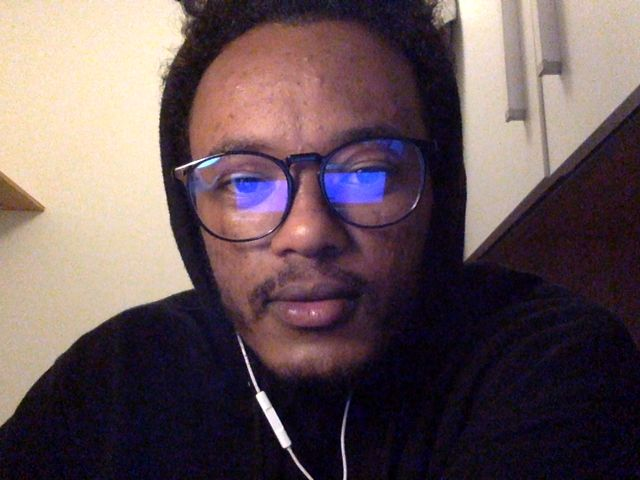

In [5]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [6]:
obj = DeepFace.analyze(img_path = "photo.jpg", actions = ['age', 'gender', 'race', 'emotion'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 67.7MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:05<00:00, 100MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:06<00:00, 85.5MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:06<00:00, 77.8MB/s]
Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


In [7]:
emotion = 'angry'
emotion_value = obj['emotion']['angry']
for i in obj['emotion']:
  if(emotion_value<obj['emotion'][i]):
    emotion = i
    emotion_value = obj['emotion'][i]
print(emotion, emotion_value)

neutral 90.83074872677021


In [9]:
import numpy as np
import glob
import cv2
import random
n = 50
if(emotion =="angry"):
  x = [random.randrange(0, 250) for _ in range(n)]
if(emotion =="disgust"):
  x = [random.randrange(250, 500) for _ in range(n)]
if(emotion =="fear"):
  x = [random.randrange(500, 750) for _ in range(n)]
if(emotion =="happy"):
  x = [random.randrange(750, 1000) for _ in range(n)]
if(emotion =="neutral"):
  x = [random.randrange(1000, 1250) for _ in range(n)]
if(emotion =="sad"):
  x = [random.randrange(1250, 1750) for _ in range(n)]
if(emotion =="sad"):
  x = [random.randrange(1750, 1999) for _ in range(n)]

img_array = []
filenames =  []
for i in x:
  if(i<10):
    filenames.append('frame0000'+str(i)+'.png')
  elif(i<100):
    filenames.append('frame000'+str(i)+'.png')
  elif(i<1000):
    filenames.append('frame00'+str(i)+'.png')
  else:
    filenames.append('frame0'+str(i)+'.png')

for filename in filenames:
  for i in range(10):
    img = cv2.imread("/content/drive/MyDrive/StyleGAN2-ADA/out/latent_walk/frames/"+filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter(emotion+'.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

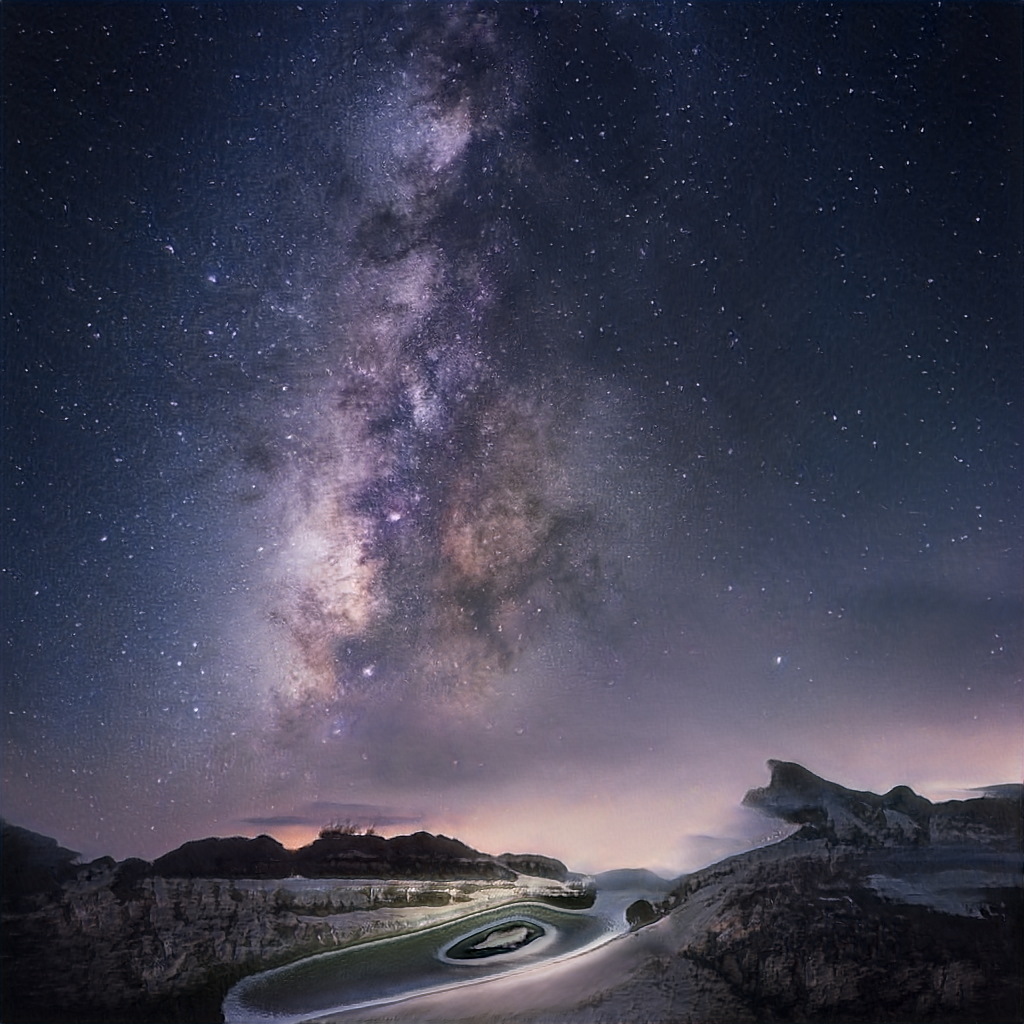

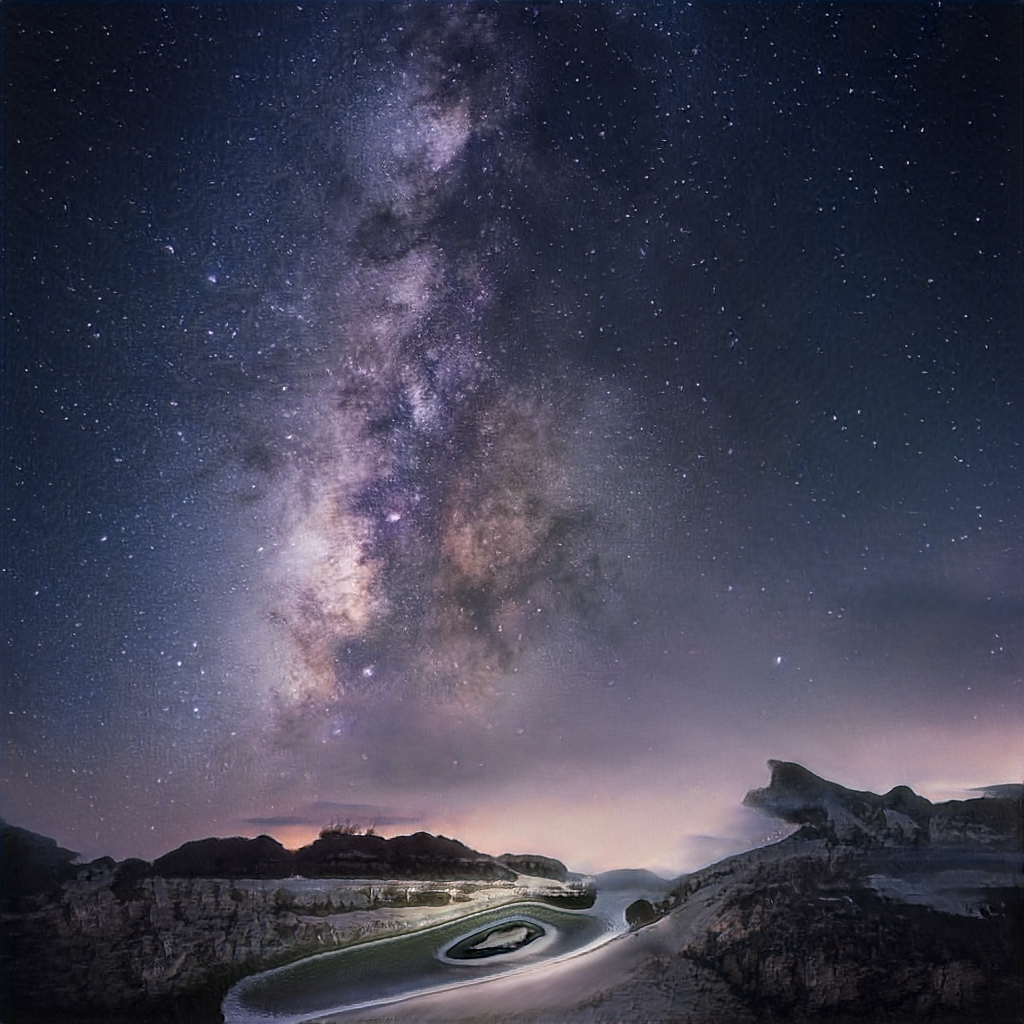

In [ ]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/content/drive/MyDrive/StyleGAN2-ADA/out/latent_walk/frames/frame01999.png') 
y = Image(filename='/content/drive/MyDrive/StyleGAN2-ADA/out/latent_walk/frames/frame01998.png') 
display(x, y)